In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import matplotlib.patches as mpatches
import seaborn
import numpy as np
from sklearn.neighbors import KNeighborsClassifier
from sklearn.model_selection import cross_val_score
from sklearn.ensemble import RandomForestClassifier
from sklearn.svm import SVC
from sklearn.decomposition import PCA
import pylab as pl
from sklearn import preprocessing
from sklearn import ensemble

In [2]:
data = pd.read_csv("EDA_Data.csv")
df = pd.DataFrame(data) # Converting data to Panda DataFrame
df.describe() #gives statistics about the columns of the dataframe

,Input,instructionCount,ilp32,ilp256,ilp2048,ilp65536,memops,ctrlops,intops,flops,...,lbdiv32,lbdiv64,lbdiv128,lbdiv256,lbdiv512,lbdiv1024,probsize,CPU Time,GPU Time,Ratio
count,9.200000e+01,9.200000e+01,92.000000,92.000000,92.000000,92.000000,92.000000,92.000000,92.000000,92.000000,...,9.200000e+01,9.200000e+01,9.200000e+01,9.200000e+01,92.000000,92.000000,9.200000e+01,92.000000,92.000000,92.000000
mean,3.433846e+07,1.026733e+10,4.821168,10.629424,77.871519,522.759291,0.718246,0.120956,0.748358,0.172102,...,1.823750e-03,2.299717e-03,2.809678e-03,3.716926e-03,25.907273,0.006410,5.622765e+05,23.576062,21.468794,4.172650
std,1.444617e+08,2.099955e+10,1.582502,8.013301,148.238324,1689.501212,0.102074,0.071988,0.110395,0.135716,...,6.113017e-03,6.922715e-03,7.304083e-03,8.547580e-03,248.444387,0.012613,1.687226e+06,39.577335,60.145783,6.327262
min,2.560000e+02,2.611762e+06,1.442210,1.918572,1.980879,2.570037,0.461629,0.007327,0.518805,0.000000,...,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000,0.000000,2.000000e+00,0.016934,0.124418,0.136106
25%,1.156000e+03,5.070753e+08,3.550877,4.515172,5.109908,5.893678,0.632344,0.073266,0.625000,0.050000,...,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000,0.000000,9.000000e+00,1.803879,0.746757,0.895365
50%,1.819200e+04,2.281993e+09,5.024231,9.030446,9.789980,14.252164,0.727796,0.100002,0.782609,0.181840,...,1.875000e-07,3.750000e-07,6.700000e-07,8.010000e-07,0.000001,0.000001,2.265000e+02,10.304666,3.133633,1.430024
75%,2.000000e+05,8.252305e+09,6.114097,13.825504,37.526273,265.235595,0.799999,0.148368,0.832094,0.242431,...,2.990832e-04,5.707265e-04,1.141453e-03,1.511418e-03,0.004566,0.002459,2.882750e+03,27.387228,13.932913,5.285624
max,1.000000e+09,1.374371e+11,7.197260,37.911765,534.000000,9023.000000,0.890129,0.307693,0.886846,0.523809,...,3.323731e-02,3.596328e-02,3.596328e-02,3.835180e-02,2383.000000,0.038502,9.862644e+06,229.742435,412.397738,34.636308


## Weight Features using Instruction Count

In [3]:
X_ = df

Weighted_X = X_[["ilp32",'ilp256','ilp2048','ilp65536','memops','ctrlops','intops','flops',
 'coldref fraction',
 'resuseDist2 fraction',
 'sfp',
 'dfp',
 'noconflict',
 'broadCast',
 'coalesced',
 'shMemBw',
 'gMemBw',
 'blocks',
 'pages',
 'lipRate',
 'mulf',
 'divf',
 'specialFn',
 'lbdiv16',
 'lbdiv32',
 'lbdiv64',
 'lbdiv128',
 'lbdiv256',
 'lbdiv512',
 'lbdiv1024']].multiply(df["instructionCount"], axis="index")

Weighted_X[['Class','ratio']] = df[['Class','Ratio']]
Weighted_X.head()

,ilp32,ilp256,ilp2048,ilp65536,memops,ctrlops,intops,flops,coldref fraction,resuseDist2 fraction,...,specialFn,lbdiv16,lbdiv32,lbdiv64,lbdiv128,lbdiv256,lbdiv512,lbdiv1024,Class,ratio
0,1.704697e+08,3.413491e+08,3.430995e+08,4.191137e+08,2.152255e+07,1.348082e+06,2.219577e+07,6.724000e+06,25740.353277,1.639676e+07,...,0.0,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,Y,3.352093
1,6.801842e+08,1.361186e+09,1.364671e+09,1.500601e+09,8.586889e+07,5.372642e+06,8.855357e+07,2.683044e+07,102446.377704,6.541300e+07,...,0.0,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,Y,3.118719
2,9.606680e+08,2.029078e+09,2.033330e+09,2.196216e+09,1.280140e+08,8.008002e+06,1.320160e+08,4.000000e+07,152660.104075,9.751672e+07,...,0.0,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,Y,1.770324
3,1.567604e+11,2.097390e+11,2.167457e+11,3.274667e+11,1.548244e+10,1.721345e+09,1.548244e+10,4.300421e+09,216294.457928,1.290201e+10,...,0.0,3.309569e+06,6.619136e+06,1.323827e+07,2.647654e+07,5.295309e+07,1.059062e+08,2.118124e+08,Y,1.074175
4,2.097592e+10,2.816598e+10,3.005618e+10,4.720231e+10,1.926544e+09,2.143277e+08,2.033603e+09,5.350871e+08,56055.966037,1.664924e+09,...,0.0,1.654784e+06,3.309568e+06,6.619136e+06,1.323827e+07,2.647654e+07,5.295309e+07,1.059062e+08,Y,1.052923


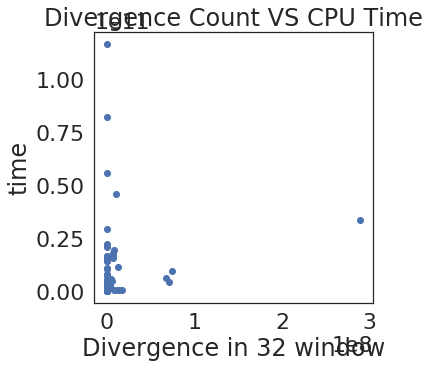

In [17]:
#df_Y = df[df['Class'] == "Y"]
#used to get an idea of distribution values of features
plt.figure(figsize=(5,5))
plt.scatter(Weighted_X['lbdiv32'], Weighted_X['memops']) 
plt.title('Divergence Count VS CPU Time')
plt.xlabel('Divergence in 32 window')
plt.ylabel('time')
plt.show()

In [5]:
yes = len(data[data.Class == "Y"])
No = len(data[data.Class == "N"])

print yes
print No

69
23


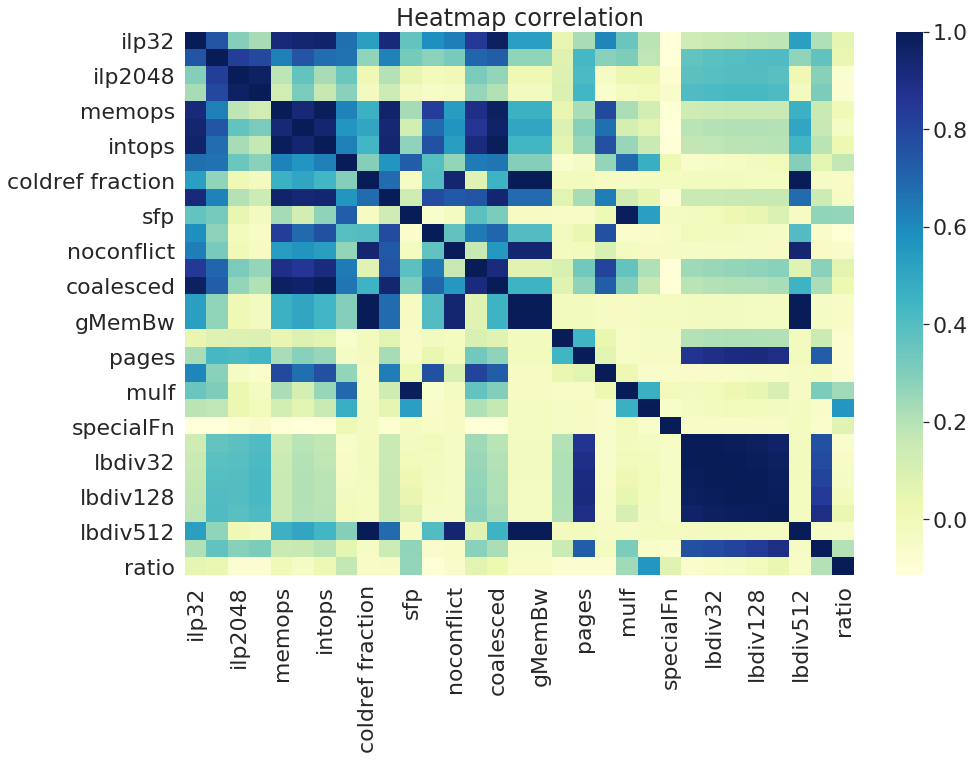

In [18]:
df_corr = Weighted_X.corr()
plt.figure(figsize=(15,10))
seaborn.heatmap(df_corr, cmap="YlGnBu") #Get an idea of correlation between the features
seaborn.set(font_scale=2,style='white')

plt.title('Heatmap correlation')
plt.show()

#generally it is good to remove higly correlated data. One reason is higly correlated data will effect the PCA. so that 
#some features will be overemphasized while some features will be underemphasized.
#one way to interpret is removing redundant features can result in a more simple model with respect to Occam's razor


## Datapreprocessing

#TODO check for gradient boosting classifier 
#class imbalance is a problem in a classification scenario so that we need to balance the classes
#recursive feature selection can be done
#due to our natures of the addressed problem we think it is profitable to use a ensemble learning technique with majority 
#voting to address our problem
#imputing missing values
#normalizing or standardizing features
#balancing classes


In [20]:
samples = len(Weighted_X.index)
print samples

92


In [8]:
%%script false
min_max_scaler = preprocessing.MinMaxScaler()#(df[['instructionCount','blocks','pages',
                                      #    'ilp32','ilp256','ilp2048','ilp65536','probsize']])
dfTest = min_max_scaler.fit_transform(df[['instructionCount','blocks','pages',
'ilp32','ilp256','ilp2048','ilp65536','probsize']])

X_train = df.drop(['CPU Time','GPU Time','Class','dataSet','Input','instructionCount','ilp32','ilp32'
                ,'ilp256','ilp2048','ilp65536','pages','blocks','coldref','reuseDist2','probsize'],axis=1)

X_train['instructionCount'] = pd.DataFrame({'instructionCount':dfTest[:,0]})
X_train['blocks']           = pd.DataFrame({'blocks':dfTest[:,1]})
X_train['pages']            = pd.DataFrame({'pages':dfTest[:,2]})
X_train['ilp32']            = pd.DataFrame({'ilp32':dfTest[:,3]})
X_train['ilp256']           = pd.DataFrame({'ilp256':dfTest[:,4]})
X_train['ilp2048']          = pd.DataFrame({'ilp2048':dfTest[:,5]})
X_train['ilp65536']         = pd.DataFrame({'ilp65536':dfTest[:,6]})
X_train['probsize']         = pd.DataFrame({'probsize':dfTest[:,6]})

X_train.head()

print X_train.shape

(92, 33)


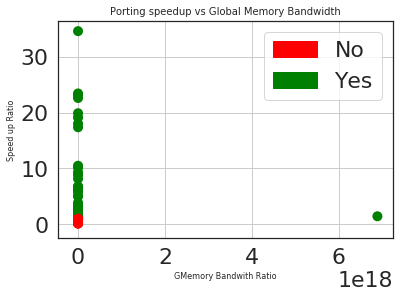

In [22]:
GMemoryB=np.array(Weighted_X['gMemBw'])
class_A = np.array(Weighted_X['Class'])

yes = 0
no =0

for i in range(0,samples-1):
    x, y = [GMemoryB[i] , ratio[i]]
    scale = 100.0
    # determine color
    class_ = class_A[i]
    color = ""
    if ratio[i] >= float(100/80):#9 percentage considered here
        color = "green"
        yes = yes + 1
    else:
        color = "red"
        no = no + 1
    plt.scatter(x, y, s=scale, c=color, alpha=1, edgecolor="none")

# Legend
red_patch = mpatches.Patch(color='red', label='No')
green_patch = mpatches.Patch(color='green', label='Yes')
plt.legend(handles=[red_patch, green_patch])
plt.title("Porting speedup vs Global Memory Bandwidth", fontsize=10)
plt.xlabel(r'GMemory Bandwith Ratio', fontsize=8)
plt.ylabel(r'Speed up Ratio', fontsize=8)
plt.grid(True)
plt.show()


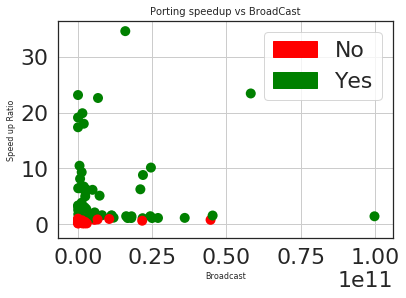

In [23]:
broadcast=np.array(Weighted_X['broadCast'])

for i in range(0,samples-1):
    x, y = [broadcast[i] , ratio[i]]
    scale = 100.0
    # determine color
    class_ = class_A[i]
    color = ""
    if ratio[i] >= float(100/80):#0.9 percentage considered here
        color = "green"
    else:
        color = "red"

    plt.scatter(x, y, s=scale, c=color, alpha=1, edgecolor="none")

# Legend
red_patch = mpatches.Patch(color='red', label='No')
green_patch = mpatches.Patch(color='green', label='Yes')
plt.legend(handles=[red_patch, green_patch])
plt.title("Porting speedup vs BroadCast", fontsize=10)
plt.xlabel(r'Broadcast', fontsize=8)
plt.ylabel(r'Speed up Ratio', fontsize=8)
plt.grid(True)
plt.show()

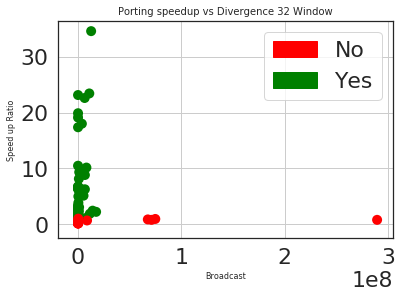

In [24]:
div32=np.array(Weighted_X['lbdiv32'])

for i in range(0,samples-1):
    x, y = [div32[i] , ratio[i]]
    scale = 100.0
    # determine color
    class_ = class_A[i]
    color = ""
    if ratio[i] >= float(100/80):#0.8 percentage considered here
        color = "green"
    else:
        color = "red"

    plt.scatter(x, y, s=scale, c=color, alpha=1, edgecolor="none")

# Legend
red_patch = mpatches.Patch(color='red', label='No')
green_patch = mpatches.Patch(color='green', label='Yes')
plt.legend(handles=[red_patch, green_patch])
plt.title("Porting speedup vs Divergence 32 Window", fontsize=10)
plt.xlabel(r'Broadcast', fontsize=8)
plt.ylabel(r'Speed up Ratio', fontsize=8)
plt.grid(True)
plt.show()

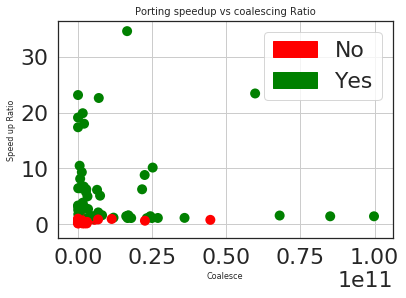

In [25]:
coalesce=np.array(Weighted_X['coalesced'])

for i in range(0,samples-1):
    x, y = [coalesce[i] , ratio[i]]
    scale = 100.0
    # determine color
    class_ = class_A[i]
    color = ""
    if ratio[i] >= float(100/80):#0.8 percentage considered here
        color = "green"
    else:
        color = "red"

    plt.scatter(x, y, s=scale, c=color, alpha=1, edgecolor="none")

# Legend
red_patch = mpatches.Patch(color='red', label='No')
green_patch = mpatches.Patch(color='green', label='Yes')
plt.legend(handles=[red_patch, green_patch])
plt.title("Porting speedup vs coalescing Ratio", fontsize=10)
plt.xlabel(r'Coalesce', fontsize=8)
plt.ylabel(r'Speed up Ratio', fontsize=8)
plt.grid(True)
plt.show()

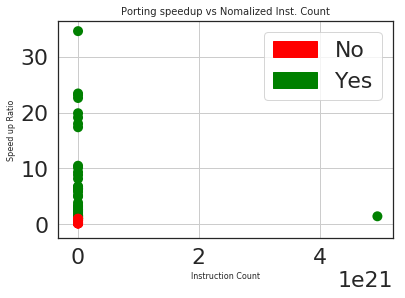

In [27]:
instCount=np.array(Weighted_X['coldref fraction'])

for i in range(0,samples-1):
    x, y = [instCount[i] , ratio[i]]
    scale = 100.0
    # determine color
    class_ = class_A[i]
    color = ""
    if ratio[i] >= float(100/80):#0.8 percentage considered here
        color = "green"
    else:
        color = "red"

    plt.scatter(x, y, s=scale, c=color, alpha=1, edgecolor="none")

# Legend
red_patch = mpatches.Patch(color='red', label='No')
green_patch = mpatches.Patch(color='green', label='Yes')
plt.legend(handles=[red_patch, green_patch])
plt.title("Porting speedup vs Nomalized Inst. Count", fontsize=10)
plt.xlabel(r'Instruction Count', fontsize=8)
plt.ylabel(r'Speed up Ratio', fontsize=8)
plt.grid(True)
plt.show()

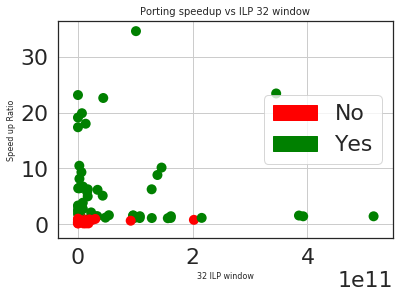

In [28]:
ilp32=np.array(Weighted_X['ilp32'])

for i in range(0,samples-1):
    x, y = [ilp32[i] , ratio[i]]
    scale = 100.0
    # determine color
    class_ = class_A[i]
    color = ""
    if ratio[i] >= float(100/80):#0.8 percentage considered here
        color = "green"
    else:
        color = "red"

    plt.scatter(x, y, s=scale, c=color, alpha=1, edgecolor="none")

# Legend
red_patch = mpatches.Patch(color='red', label='No')
green_patch = mpatches.Patch(color='green', label='Yes')
plt.legend(handles=[red_patch, green_patch])
plt.title("Porting speedup vs ILP 32 window", fontsize=10)
plt.xlabel(r'32 ILP window', fontsize=8)
plt.ylabel(r'Speed up Ratio', fontsize=8)
plt.grid(True)
plt.show()

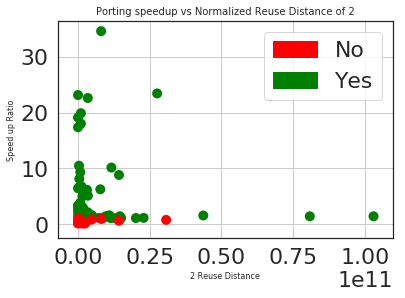

In [29]:
reuseDist2=np.array(Weighted_X['resuseDist2 fraction'])

for i in range(0,samples-1):
    x, y = [reuseDist2[i] , ratio[i]]
    scale = 100.0
    # determine color
    class_ = class_A[i]
    color = ""
    if ratio[i] >= float(100/80):#0.8 percentage considered here
        color = "green"
    else:
        color = "red"

    plt.scatter(x, y, s=scale, c=color, alpha=1, edgecolor="none")

# Legend
red_patch = mpatches.Patch(color='red', label='No')
green_patch = mpatches.Patch(color='green', label='Yes')
plt.legend(handles=[red_patch, green_patch])
plt.title("Porting speedup vs Normalized Reuse Distance of 2", fontsize=10)
plt.xlabel(r'2 Reuse Distance', fontsize=8)
plt.ylabel(r'Speed up Ratio', fontsize=8)
plt.grid(True)
plt.show()

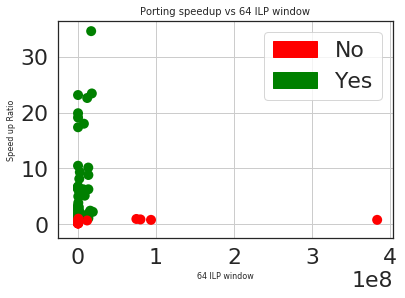

In [30]:
lbdiv64=np.array(Weighted_X['lbdiv64'])

for i in range(0,samples-1):
    x, y = [lbdiv64[i] , ratio[i]]
    scale = 100.0
    # determine color
    class_ = class_A[i]
    color = ""
    if ratio[i] >= float(100/80):#0.8 percentage considered here
        color = "green"
    else:
        color = "red"

    plt.scatter(x, y, s=scale, c=color, alpha=1, edgecolor="none")

# Legend
red_patch = mpatches.Patch(color='red', label='No')
green_patch = mpatches.Patch(color='green', label='Yes')
plt.legend(handles=[red_patch, green_patch])
plt.title("Porting speedup vs 64 ILP window", fontsize=10)
plt.xlabel(r'64 ILP window', fontsize=8)
plt.ylabel(r'Speed up Ratio', fontsize=8)
plt.grid(True)
plt.show()